# Import Library

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno 
from termcolor import colored 


# Import Dataset

In [11]:
train = pd.read_csv("/kaggle/input/migros-datathon-coderspace/train.csv")
test = pd.read_csv("/kaggle/input/migros-datathon-coderspace/test.csv")
customeraccount = pd.read_csv("/kaggle/input/migros-datathon-coderspace/customeraccount.csv")
transaction_header = pd.read_csv("/kaggle/input/migros-datathon-coderspace/transaction_header.csv")
genel_kategoriler = pd.read_csv("/kaggle/input/migros-datathon-coderspace/genel_kategoriler.csv")
customer = pd.read_csv("/kaggle/input/migros-datathon-coderspace/customer.csv")
product_groups = pd.read_csv("/kaggle/input/migros-datathon-coderspace/product_groups.csv")
transaction_sale = pd.read_csv("/kaggle/input/migros-datathon-coderspace/transaction_sale/transaction_sale.csv")

In [12]:
df = [train,test,customeraccount,transaction_header,genel_kategoriler,customer,product_groups,transaction_sale]

In [13]:
df

[       individualnumber  category_number  hakkedis_amt  odul_amt  response
 0              94230288             9000          21.0       2.0         0
 1               4684087             9000          17.0       1.0         0
 2              92472145             9058          24.0       3.0         0
 3              88026681             9030          22.0       2.0         0
 4              98127795             9001          38.0       3.0         0
 ...                 ...              ...           ...       ...       ...
 13110          97214433             9059          27.0       2.0         0
 13111          96841665             9004          65.0       6.0         0
 13112          98445787             9044          33.0       3.0         0
 13113          13781030             9004          66.0       6.0         0
 13114          96703898             9017          15.0       1.0         0
 
 [13115 rows x 5 columns],
        individualnumber  category_number  hakkedis_amt  od

# EXPLORATORY DATA ANALYSIS

In [14]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [15]:
def check_df(dataframe, head=5): 
    name_of_df = " "+get_df_name(dataframe).upper() + " "
    print(f" {colored(name_of_df.center(50, '~'), 'blue', attrs=['reverse'])}", "\n")
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


In [16]:
for dff in df: 
    check_df(dff)

 ~~~~~~~~~~~~~~~~~~~~~ TRAIN ~~~~~~~~~~~~~~~~~~~~~~ 

##################### Shape #####################
(13115, 5)
##################### Types #####################
individualnumber      int64
category_number       int64
hakkedis_amt        float64
odul_amt            float64
response              int64
dtype: object
##################### Head #####################
   individualnumber  category_number  hakkedis_amt  odul_amt  response
0          94230288             9000          21.0       2.0         0
1           4684087             9000          17.0       1.0         0
2          92472145             9058          24.0       3.0         0
3          88026681             9030          22.0       2.0         0
4          98127795             9001          38.0       3.0         0
##################### Tail #####################
       individualnumber  category_number  hakkedis_amt  odul_amt  response
13110          97214433             9059          27.0       2.0         0
13111  

In [17]:
# Sütunların isimleri 
def grab_col_names(dataframe, cat_th=10,  car_th=20, report=False):
    """
    Bir veri seti içerisindeki kategorik, numerik, kategorik gözüken ama aslında kardinal olan değişkenleri verir.

    Parameters
    ----------
        dataframe: DataFrame
            Kullanacağımız veri seti
        cat_th: int, default=10
            Eşsiz değer sınırı. Eğer numerik değişkenin sınırın altındaysa kategorik listesine alınır.
        car_th: int, default=20
            Kardinal değer sınırı. Eğer kategorik bir değişken bu değerin üzerindeyse kardinal listesine eklenir.

    Returns
    -------
        cat_cols: list
            Kategorik değişkenlerin listesi
        num_cols: list
            Numerik değişkenlerin listesi
        cat_but_car: list
            Kategorik gözüken kardinal değişkenlerin listesi

    Notes
    -----
        Numerik gözüken fakat az sayıda eşsiz değer içeren değişkenler de numerik listesine alınır. Yani cat_cols, num_but_cat listesini içerir.
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı

    """
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["int", "float"]]

    cat_but_car = [col for col in dataframe.columns if
                   dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category", "object"]]

    # final categorical variables
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # final numerical variables
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int", "float"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    # report
    if report:
        print(f"Observations: {dataframe.shape[0]}")
        print(f"Variables: {dataframe.shape[1]}")
        print(f'cat_cols: {len(cat_cols)}')
        print(f'num_cols: {len(num_cols)}')
        print(f'cat_but_car: {len(cat_but_car)}')
        print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


for dff in df:
    name_of_df = " "+ get_df_name(dff).upper() + " "
    print(f" {colored(name_of_df.center(50, '~'), 'green', attrs=['reverse'])}", "\n")
    cat_cols, num_cols, cat_but_car = grab_col_names(dff, report=True)
    print(f"\n{colored('Numerical Columns:','yellow', attrs=['reverse'])} {num_cols}\n\n{colored('Categorical Columns:','magenta', attrs=['reverse'])} {cat_cols}\n\n"
          f"{colored('Cardinal Columns:','blue', attrs=['reverse'])}{cat_but_car}\n")

 ~~~~~~~~~~~~~~~~~~~~~ TRAIN ~~~~~~~~~~~~~~~~~~~~~~ 

Observations: 13115
Variables: 5
cat_cols: 1
num_cols: 4
cat_but_car: 0
num_but_cat: 1

Numerical Columns: ['individualnumber', 'category_number', 'hakkedis_amt', 'odul_amt']

Categorical Columns: ['response']

Cardinal Columns:[]

 ~~~~~~~~~~~~~~~~~~~~~~ TEST ~~~~~~~~~~~~~~~~~~~~~~ 

Observations: 13236
Variables: 4
cat_cols: 0
num_cols: 4
cat_but_car: 0
num_but_cat: 0

Numerical Columns: ['individualnumber', 'category_number', 'hakkedis_amt', 'odul_amt']

Categorical Columns: []

Cardinal Columns:[]

 ~~~~~~~~~~~~~~~~ CUSTOMERACCOUNT ~~~~~~~~~~~~~~~~~ 

Observations: 35159
Variables: 2
cat_cols: 0
num_cols: 2
cat_but_car: 0
num_but_cat: 0

Numerical Columns: ['individualnumber', 'cardnumber']

Categorical Columns: []

Cardinal Columns:[]

 ~~~~~~~~~~~~~~~ TRANSACTION_HEADER ~~~~~~~~~~~~~~~ 

Observations: 1124673
Variables: 4
cat_cols: 1
num_cols: 2
cat_but_car: 1
num_but_cat: 1

Numerical Columns: ['cardnumber', 'basketid']

Cate

# Categoric

In [18]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

    if plot:
        explode = []
        for i in range(len(dataframe[col_name].value_counts())):
            explode.append(i*0.05)
        f,ax=plt.subplots(1,2, figsize=(10,4))
        dataframe[col_name].value_counts().plot.pie(explode=explode,autopct='%1.1f%%',ax=ax[0],shadow=True)
        ax[0].set_title(f"Distribution of {col_name}", fontdict={"fontsize":15})
        ax[0].set_ylabel("")
        sns.countplot(x=dataframe[col_name], data=dataframe, ax=ax[1])
        ax[1].set_title(f"Count of {col_name}", fontdict={"fontsize":15})
        ax[1].set_xlabel("")
        plt.tight_layout()
        plt.show()

               genel_kategori  Ratio
gida                       30   60.0
diger                       7   14.0
kisisel_bakim               6   12.0
hijyen                      5   10.0
icecek                      2    4.0
##########################################


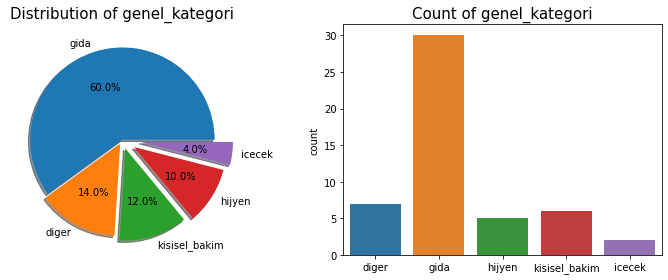

In [19]:
cat_summary(genel_kategoriler, "genel_kategori", plot=True)

# Numerical 

In [20]:
num_cols = [col for col in train.columns if train[col].dtypes in ["int","float"]] 
num_cols

['individualnumber', 'category_number', 'hakkedis_amt', 'odul_amt', 'response']

count    13115.000000
mean         0.015936
std          0.125233
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
max          1.000000
Name: response, dtype: float64


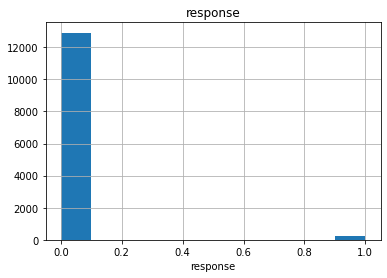

In [21]:
def num_summary(dataframe,numerical_col, plot = False):  
    quantiles = [0.05 ,0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90] 
    print(dataframe[numerical_col].describe(quantiles).T) 
    
    if plot: 
        dataframe[numerical_col].hist() 
        plt.xlabel(numerical_col)
        plt.title(numerical_col) 
        plt.show(block=True) 

num_summary(train,"response",plot=True)


count    1.311500e+04
mean     9.020365e+07
std      2.100606e+07
min      4.524800e+05
5%       2.277912e+07
10%      7.825941e+07
20%      9.289663e+07
30%      9.411915e+07
40%      9.520079e+07
50%      9.636461e+07
60%      9.757606e+07
70%      9.881976e+07
80%      1.000791e+08
90%      1.011823e+08
max      1.022808e+08
Name: individualnumber, dtype: float64


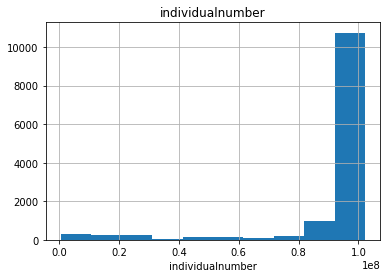

count    13115.000000
mean      9029.460389
std         17.724430
min       9000.000000
5%        9000.000000
10%       9003.000000
20%       9010.000000
30%       9018.000000
40%       9022.000000
50%       9032.000000
60%       9038.000000
70%       9043.000000
80%       9046.000000
90%       9049.000000
max       9061.000000
Name: category_number, dtype: float64


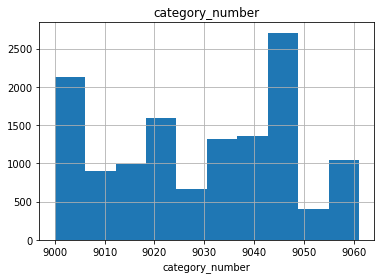

count    13115.000000
mean        40.054213
std         25.839057
min          7.000000
5%          12.000000
10%         15.000000
20%         18.000000
30%         23.000000
40%         27.000000
50%         32.000000
60%         37.000000
70%         44.000000
80%         63.000000
90%         85.000000
max        180.000000
Name: hakkedis_amt, dtype: float64


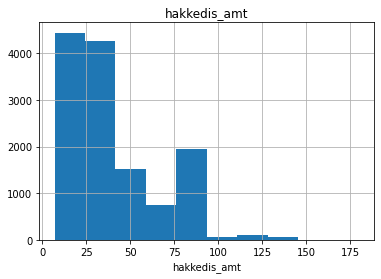

count    13115.000000
mean         3.679832
std          2.675766
min          1.000000
5%           1.000000
10%          1.000000
20%          1.000000
30%          2.000000
40%          2.000000
50%          3.000000
60%          3.000000
70%          4.000000
80%          6.000000
90%          8.000000
max         20.000000
Name: odul_amt, dtype: float64


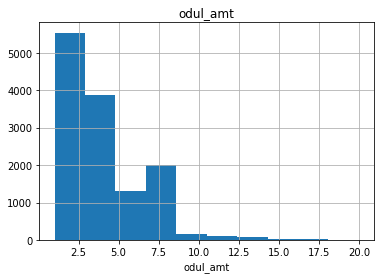

count    13115.000000
mean         0.015936
std          0.125233
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
max          1.000000
Name: response, dtype: float64


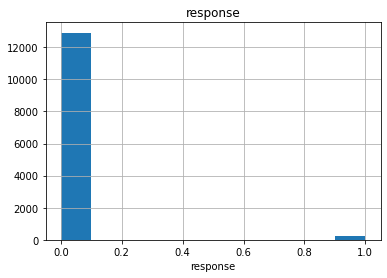

In [22]:
for col in num_cols: 
    num_summary(train,col,plot=True)

# Target Analyze

In [23]:
def target_summary_with_num(dataframe, target, numerical_col, plot=False):
    print(f" {numerical_col} ".center(70,"#"), end="\n\n")
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n")

num_cols_target = train.select_dtypes(include="number")
num_cols_target = [col for col in num_cols_target if col != "response"]
for col in num_cols_target:
    target_summary_with_num(train, "response", col, plot=True)

########################## individualnumber ##########################

          individualnumber
response                  
0             9.048553e+07
1             7.279688e+07

########################## category_number ###########################

          category_number
response                 
0             9029.518751
1             9025.856459

############################ hakkedis_amt ############################

          hakkedis_amt
response              
0            39.971331
1            45.172249

############################## odul_amt ##############################

          odul_amt
response          
0         3.658996
1         4.966507



# Missing Value

In [24]:
dff.isnull()

,basketid,category_level_1,category_level_2,category_level_3,category_level_4,amount,quantity,discount_type_1,discount_type_2,discount_type_3
0,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
6537876,False,False,False,False,False,False,False,True,False,False
6537877,False,False,False,False,False,False,False,True,False,False
6537878,False,False,False,False,False,False,False,True,False,False
6537879,False,False,False,False,False,False,False,True,False,False


In [25]:
dff.head()

,basketid,category_level_1,category_level_2,category_level_3,category_level_4,amount,quantity,discount_type_1,discount_type_2,discount_type_3
0,20120706070177471,613,50,50,15,19.9,2.0,NaN,0.0,0.0
1,20120706070177471,425,30,12,10,3.5,1.0,NaN,0.0,0.0
2,20120706070177471,425,30,12,11,7.9,1.0,NaN,0.0,0.0
3,20122703940031323,103,25,15,10,7.9,2.0,NaN,0.0,0.0
4,20122703940031323,101,15,15,15,16.0,1.0,NaN,0.0,0.0


In [26]:
dff.isnull().sum()

basketid                  0
category_level_1          0
category_level_2          0
category_level_3          0
category_level_4          0
amount                    0
quantity                  0
discount_type_1     4648873
discount_type_2         130
discount_type_3         128
dtype: int64

In [27]:
dff

,basketid,category_level_1,category_level_2,category_level_3,category_level_4,amount,quantity,discount_type_1,discount_type_2,discount_type_3
0,20120706070177471,613,50,50,15,19.90,2.0,NaN,0.0,0.00
1,20120706070177471,425,30,12,10,3.50,1.0,NaN,0.0,0.00
2,20120706070177471,425,30,12,11,7.90,1.0,NaN,0.0,0.00
3,20122703940031323,103,25,15,10,7.90,2.0,NaN,0.0,0.00
4,20122703940031323,101,15,15,15,16.00,1.0,NaN,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...
6537876,20120839080026509,103,35,10,10,2.95,1.0,NaN,0.0,0.00
6537877,20120839080026509,130,85,11,10,3.40,1.0,NaN,0.0,0.00
6537878,20120839080026509,131,10,10,20,4.45,1.0,NaN,0.0,0.00
6537879,21101831040099839,103,35,10,10,0.01,1.0,NaN,0.0,1.24


In [28]:
dff.drop('discount_type_1',axis=1, inplace = True)

In [29]:
dff.drop('discount_type_2',axis=1, inplace = True)

In [30]:
dff.drop('discount_type_3',axis=1, inplace = True)

In [31]:
dff.isnull().sum()

basketid            0
category_level_1    0
category_level_2    0
category_level_3    0
category_level_4    0
amount              0
quantity            0
dtype: int64

# Train and Test

In [32]:
train.head()

,individualnumber,category_number,hakkedis_amt,odul_amt,response
0,94230288,9000,21.0,2.0,0
1,4684087,9000,17.0,1.0,0
2,92472145,9058,24.0,3.0,0
3,88026681,9030,22.0,2.0,0
4,98127795,9001,38.0,3.0,0


In [33]:
test.head()

,individualnumber,category_number,hakkedis_amt,odul_amt
0,95812936,9029,38.0,3.0
1,23929570,9012,28.0,2.0
2,95948115,9019,21.0,2.0
3,100898513,9035,48.0,4.0
4,12769156,9015,26.0,3.0


In [34]:
check_df(train)

 ~~~~~~~~~~~~~~~~~~~~~ TRAIN ~~~~~~~~~~~~~~~~~~~~~~ 

##################### Shape #####################
(13115, 5)
##################### Types #####################
individualnumber      int64
category_number       int64
hakkedis_amt        float64
odul_amt            float64
response              int64
dtype: object
##################### Head #####################
   individualnumber  category_number  hakkedis_amt  odul_amt  response
0          94230288             9000          21.0       2.0         0
1           4684087             9000          17.0       1.0         0
2          92472145             9058          24.0       3.0         0
3          88026681             9030          22.0       2.0         0
4          98127795             9001          38.0       3.0         0
##################### Tail #####################
       individualnumber  category_number  hakkedis_amt  odul_amt  response
13110          97214433             9059          27.0       2.0         0
13111  

In [35]:
check_df(test)

 ~~~~~~~~~~~~~~~~~~~~~~ TEST ~~~~~~~~~~~~~~~~~~~~~~ 

##################### Shape #####################
(13236, 4)
##################### Types #####################
individualnumber      int64
category_number       int64
hakkedis_amt        float64
odul_amt            float64
dtype: object
##################### Head #####################
   individualnumber  category_number  hakkedis_amt  odul_amt
0          95812936             9029          38.0       3.0
1          23929570             9012          28.0       2.0
2          95948115             9019          21.0       2.0
3         100898513             9035          48.0       4.0
4          12769156             9015          26.0       3.0
##################### Tail #####################
       individualnumber  category_number  hakkedis_amt  odul_amt
13231          93418529             9049          32.0       3.0
13232          97397069             9018          20.0       2.0
13233          95212479             9046          

In [36]:
train_test = pd.concat([train, test], axis = 0 ,ignore_index= True)

In [37]:
train_test.head()

,individualnumber,category_number,hakkedis_amt,odul_amt,response
0,94230288,9000,21.0,2.0,0.0
1,4684087,9000,17.0,1.0,0.0
2,92472145,9058,24.0,3.0,0.0
3,88026681,9030,22.0,2.0,0.0
4,98127795,9001,38.0,3.0,0.0


# Data Cleaning

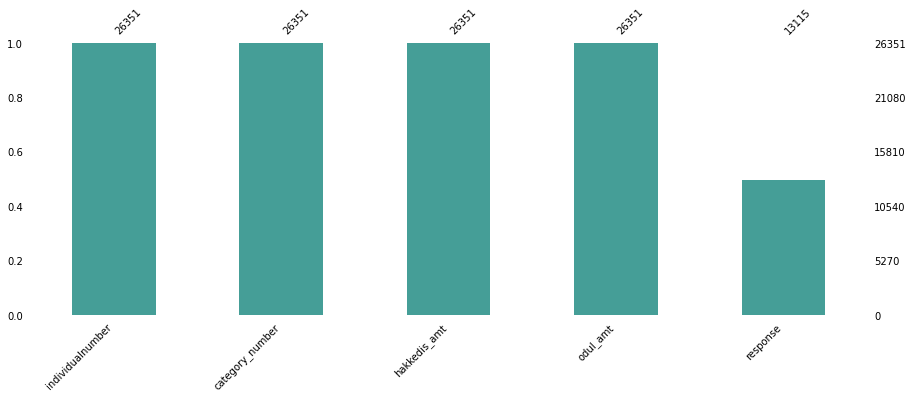

In [38]:
msno.bar(train_test,figsize=(15, 5),fontsize=10,color = '#459E97');

# HeatMap Correlation

<AxesSubplot:>

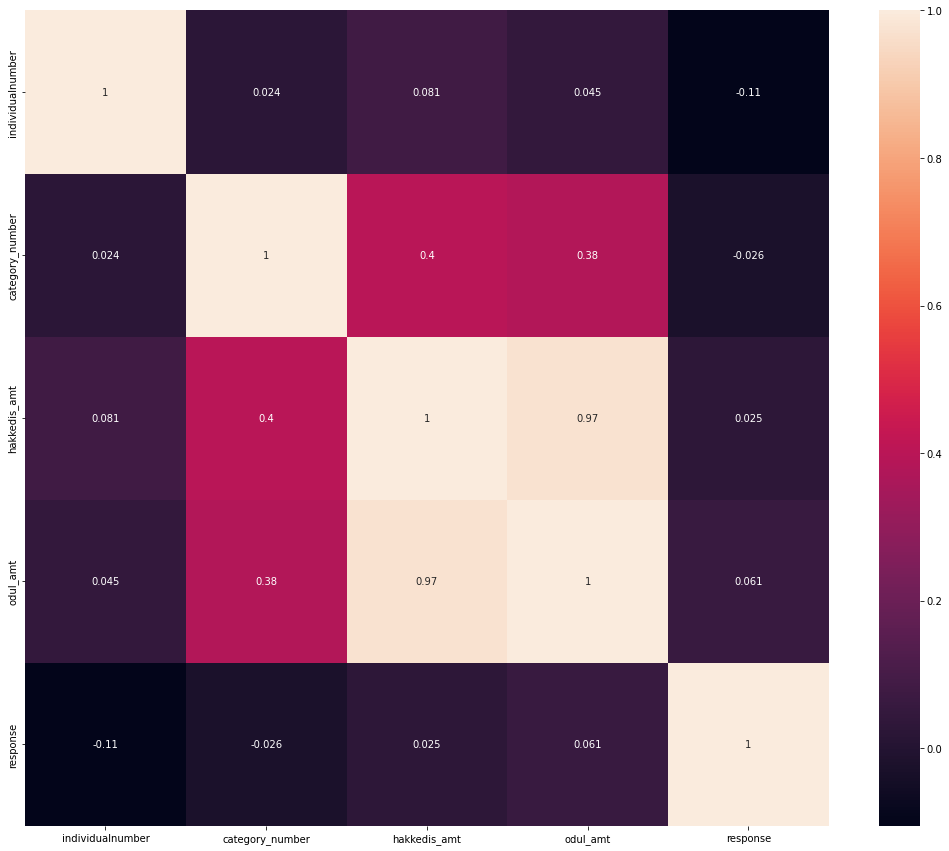

In [39]:
plt.figure(figsize=(18,15))
sns.heatmap(data=train_test.corr(), annot=True)

In [40]:
train_test.corr()

,individualnumber,category_number,hakkedis_amt,odul_amt,response
individualnumber,1.000000,0.023806,0.080576,0.044534,-0.105455
category_number,0.023806,1.000000,0.397397,0.380360,-0.025876
hakkedis_amt,0.080576,0.397397,1.000000,0.973395,0.025207
odul_amt,0.044534,0.380360,0.973395,1.000000,0.061195
response,-0.105455,-0.025876,0.025207,0.061195,1.000000


In [41]:
train_test.to_csv('train_test.csv')

# Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
# na values to 0 
train_test = train_test.fillna(0)

In [44]:
train_test.isnull().sum()

individualnumber    0
category_number     0
hakkedis_amt        0
odul_amt            0
response            0
dtype: int64

In [45]:
train_test.dtypes

individualnumber      int64
category_number       int64
hakkedis_amt        float64
odul_amt            float64
response            float64
dtype: object

In [46]:
X = train_test.drop('response',axis=1).values
y = train_test['response'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (21080, 4)
Size of y_train :  (21080, 1)
Size of X_test :  (5271, 4)
Size of Y_test :  (5271, 1)


In [47]:
%%time
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

CPU times: user 6.39 ms, sys: 861 µs, total: 7.25 ms
Wall time: 6.49 ms


LinearRegression()

In [48]:
# y_hat = b + w*TV->x

# sabit (b - bias) -> ilgili sabit gelsin [0]
linear_reg.intercept_[0]

1.3389637220733768

In [49]:
# category_numer'nin katsayısı(w1) 

linear_reg.coef_[0][0]

-2.7153008080231876e-10

In [50]:
linear_reg.coef_[0]

array([-2.71530081e-10, -1.44651546e-04, -1.30547391e-03,  1.41260272e-02])

Predict

In [51]:
# soru = 150 birimlik category_numer olsa ne kadar artış olması beklenir ? 


linear_reg.intercept_[0] + linear_reg.coef_[0][0] * 150

1.3389636813438646

MSE

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error 

In [53]:
y_pred = linear_reg.predict(X) 
mean_squared_error(y,y_pred)

0.007732998939472035

In [54]:
y.mean()

0.007931387803119427

In [55]:
y.std()

0.0887044581215395

RMSE

In [56]:
np.sqrt(mean_absolute_error(y,y_pred))

0.12787120887442502

MAE

In [57]:
mean_absolute_error(y,y_pred)

0.01635104605900683

R-square

In [58]:
linear_reg.score(X,y)

0.017218311011614973

# Multiple Linear Regression

In [59]:
# değişkenleri oluşturmak için önce seçelim
# bağımsız değişkeni seçelim
X = train_test.drop('response',axis=1)

In [60]:
X

,individualnumber,category_number,hakkedis_amt,odul_amt
0,94230288,9000,21.0,2.0
1,4684087,9000,17.0,1.0
2,92472145,9058,24.0,3.0
3,88026681,9030,22.0,2.0
4,98127795,9001,38.0,3.0
...,...,...,...,...
26346,93418529,9049,32.0,3.0
26347,97397069,9018,20.0,2.0
26348,95212479,9046,85.0,8.0
26349,93406449,9032,39.0,3.0


In [61]:
# bağımsız değişkeni seçelim 

y = train_test[["response"]]

In [62]:
y

,response
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
26346,0.0
26347,0.0
26348,0.0
26349,0.0


In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y, 
                                                test_size=0.20, random_state=1)


In [64]:
X_train.shape

(21080, 4)

In [65]:
# train 
# 1. kullanım 
linear_reg = LinearRegression() 
linear_reg.fit(X_train, y_train) 

# 2. kullanım 
linear_reg = LinearRegression().fit(X_train, y_train) 
linear_reg


LinearRegression()

In [66]:
# sabit (b - bias) 
linear_reg.intercept_

array([1.37560116])

In [67]:
# katsayılar -> coefficients(w -weights) 

linear_reg.coef_

array([[-2.40967219e-10, -1.48978651e-04, -1.39234723e-03,
         1.49565478e-02]])

In [68]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV 
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix

In [69]:
cv_linear_reg = cross_val_score(estimator = linear_reg, X = X, y = y, cv = 5)

y_pred_linear_reg_train = linear_reg.predict(X_train)
r2_score_linear_reg_train = r2_score(y_train, y_pred_linear_reg_train)

y_pred_linear_reg_test = linear_reg.predict(X_test)
r2_score_linear_reg_test = r2_score(y_test, y_pred_linear_reg_test)

rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_reg_test)))

print('CV Linear Regression : {0:.3f}'.format(cv_linear_reg.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_linear_reg_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_linear_reg_test))
print('RMSE : {0:.3f}'.format(rmse_linear))

CV Linear Regression : 0.007
R2_score (train) : 0.017
R2_score (test) : 0.020
RMSE : 0.087


# Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression 

In [71]:
y = train_test["response"] 
X = train_test.drop(["response"],axis=1)

In [72]:
log_model = LogisticRegression().fit(X,y)

In [73]:
X

,individualnumber,category_number,hakkedis_amt,odul_amt
0,94230288,9000,21.0,2.0
1,4684087,9000,17.0,1.0
2,92472145,9058,24.0,3.0
3,88026681,9030,22.0,2.0
4,98127795,9001,38.0,3.0
...,...,...,...,...
26346,93418529,9049,32.0,3.0
26347,97397069,9018,20.0,2.0
26348,95212479,9046,85.0,8.0
26349,93406449,9032,39.0,3.0


In [74]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
26346    0.0
26347    0.0
26348    0.0
26349    0.0
26350    0.0
Name: response, Length: 26351, dtype: float64

In [75]:
log_model = LogisticRegression().fit(X,y)

In [76]:
# constant value

log_model.intercept_

array([-3.77147279e-08])

In [77]:
# weights 

log_model.coef_

array([[-2.11024368e-08, -3.40577285e-04, -1.18892952e-06,
        -1.03993639e-07]])

In [78]:
y_pred = log_model.predict(X)

In [79]:
# predict
y_pred[0:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [80]:
# validation/test 
y[0:10]

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: response, dtype: float64

In [81]:
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, roc_auc_score,confusion_matrix,classification_report,plot_roc_curve 
from sklearn.model_selection import train_test_split, cross_validate 

In [83]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     26142
         1.0       0.00      0.00      0.00       209

    accuracy                           0.99     26351
   macro avg       0.50      0.50      0.50     26351
weighted avg       0.98      0.99      0.99     26351



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN

In [84]:
train_test["response"].value_counts()


0.0    26142
1.0      209
Name: response, dtype: int64

In [85]:
y = train_test["response"] 
X = train_test.drop(["response"], axis=1)

In [86]:
# standartlaşma yapmak verinin daha doğru/başarılı olmasını sağlayacaktır.

from sklearn.preprocessing import StandardScaler

In [87]:
X_scaled = StandardScaler().fit_transform(X)

In [88]:
X_scaled

array([[ 0.19322186, -1.66317962, -0.74462007, -0.63578287],
       [-4.06445966, -1.66317962, -0.90010088, -1.01181004],
       [ 0.10962687,  1.59732768, -0.62800947, -0.2597557 ],
       ...,
       [ 0.2399224 ,  0.92273996,  1.74307284,  1.62038013],
       [ 0.15405052,  0.13572096, -0.04495644, -0.2597557 ],
       [ 0.4101571 , -1.21345448, -0.78349027, -0.63578287]])

In [89]:
# sütun isimlerini ekleme 
X = pd.DataFrame(X_scaled, columns=X.columns)

In [90]:
X

,individualnumber,category_number,hakkedis_amt,odul_amt
0,0.193222,-1.663180,-0.744620,-0.635783
1,-4.064460,-1.663180,-0.900101,-1.011810
2,0.109627,1.597328,-0.628009,-0.259756
3,-0.101743,0.023290,-0.705750,-0.635783
4,0.378538,-1.606964,-0.083827,-0.259756
...,...,...,...,...
26346,0.154625,1.091387,-0.317048,-0.259756
26347,0.343794,-0.651298,-0.783490,-0.635783
26348,0.239922,0.922740,1.743073,1.620380
26349,0.154051,0.135721,-0.044956,-0.259756


Modelling & Prediction

In [91]:
from sklearn.neighbors import KNeighborsClassifier 

In [92]:
knn_model = KNeighborsClassifier().fit(X,y)

In [93]:
knn_model

KNeighborsClassifier()

In [94]:
random_user = X.sample(1, random_state=45)

In [95]:
random_user

,individualnumber,category_number,hakkedis_amt,odul_amt
1223,0.157964,0.641662,-0.550269,-0.259756


In [96]:
knn_model.predict(random_user)

array([0.])

Model Evaluation(Model başarısı değerlendirme)

In [97]:
# tüm modeller için ,tahmin 
# confusion matrix için y_pred : 

y_pred = knn_model.predict(X)


In [98]:
# AUC ,ROC 

# AUC için y_pred : 
y_prob = knn_model.predict_proba(X)[:,1] 

print(classification_report(y,y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     26142
         1.0       1.00      0.01      0.03       209

    accuracy                           0.99     26351
   macro avg       1.00      0.51      0.51     26351
weighted avg       0.99      0.99      0.99     26351



In [99]:
# AUC 
roc_auc_score(y,y_prob)

0.9873284992270774

In [100]:
# modelin görmediği yerleri test etme 
# - holdout 
# - crossvalidation 

In [101]:
#crossvalidation 
# scoring : birden fazla sütuna bakmak için 
cv_result = cross_validate(knn_model, X ,y, cv=5, scoring=["accuracy","f1","roc_auc"])


In [102]:
cv_result

{'fit_time': array([0.01906919, 0.01785636, 0.01765537, 0.01741791, 0.01783824]),
 'score_time': array([0.21273017, 0.20364809, 0.20387006, 0.20663714, 0.2021029 ]),
 'test_accuracy': array([0.99203187, 0.99222011, 0.99222011, 0.99203036, 0.99203036]),
 'test_f1': array([0.        , 0.        , 0.04651163, 0.        , 0.        ]),
 'test_roc_auc': array([0.5664176 , 0.55601034, 0.56577905, 0.56548074, 0.53146063])}

In [103]:
# ortalamasını alalım 
# modeli doğrulamk için crossvalidate edilir
cv_result['test_accuracy'].mean() 
cv_result['test_f1'].mean() 
cv_result['test_roc_auc'].mean()


0.5570296717997822

In [104]:
cv_result['test_accuracy'].mean() 

0.9921065642553127

In [105]:
cv_result['test_f1'].mean() 

0.009302325581395349

In [106]:
cv_result['test_roc_auc'].mean()

0.5570296717997822

In [107]:
# kullanıcı tarafından tanınması gereken dışardan tanınması gerekenlere "hiper parametre" denir . 
knn_model.get_params()


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

 Hyperparameter Optimization

In [108]:
# dışsal parametreler en uygun şekilde ayarlamamız lazım
knn_model = KNeighborsClassifier() 
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [109]:
knn_params = {"n_neighbors":range(2,70)}

In [110]:
# belirlediğimiz n_neighborsları arayalım 
# n_jobs : en yüksek/hızlı şekilde sonuçlara gider 
# verbose : rapor istiyorsak kullanırız
knn_gs_best = GridSearchCV(knn_model,knn_params,cv=5,n_jobs=-1).fit(X,y)
knn_gs_best


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(2, 70)})

In [111]:
knn_gs_best.best_params_

{'n_neighbors': 4}

Final Model

In [112]:
# parametreyi bulduk ama gel tekrardan fit edilmesi gerek
knn_final = knn_model.set_params(**knn_gs_best.best_params_).fit(X,y)

In [113]:
knn_final

KNeighborsClassifier(n_neighbors=4)

In [114]:
# test hastasına bakalım ; crossvalidate 

cv_results = cross_validate(knn_final, 
                          X, 
                          y,
                          cv=5,
                          scoring=["accuracy","f1","roc_auc"]) 

In [115]:
cv_results['test_accuracy'].mean() 

0.9921065642553127

In [116]:
cv_results['test_f1'].mean() 

0.009302325581395349

In [117]:
cv_results['test_roc_auc'].mean()

0.5481923341934142

# CART

In [118]:
y = train_test["response"] 
X = train_test.drop(["response"], axis = 1)

In [119]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
26346    0.0
26347    0.0
26348    0.0
26349    0.0
26350    0.0
Name: response, Length: 26351, dtype: float64

In [120]:
X

,individualnumber,category_number,hakkedis_amt,odul_amt
0,94230288,9000,21.0,2.0
1,4684087,9000,17.0,1.0
2,92472145,9058,24.0,3.0
3,88026681,9030,22.0,2.0
4,98127795,9001,38.0,3.0
...,...,...,...,...
26346,93418529,9049,32.0,3.0
26347,97397069,9018,20.0,2.0
26348,95212479,9046,85.0,8.0
26349,93406449,9032,39.0,3.0


In [121]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text 
from sklearn.metrics import classification_report, roc_auc_score 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve 


In [122]:
cart_model = DecisionTreeClassifier(random_state = 1).fit(X, y)

In [123]:
# Confusion matrix için y_pred : 

y_pred = cart_model.predict(X)

In [124]:
# AUC için y_prob 

y_prob = cart_model.predict_proba(X)[: , 1]

In [125]:
# Confusion matrix 

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     26142
         1.0       1.00      1.00      1.00       209

    accuracy                           1.00     26351
   macro avg       1.00      1.00      1.00     26351
weighted avg       1.00      1.00      1.00     26351



In [126]:
# AUC

roc_auc_score(y, y_prob)

1.0

In [127]:
# veri setini train ve test olarak 2 ye ayırıyoruz 

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.30, random_state = 17 )

In [128]:
cart_model = DecisionTreeClassifier(random_state = 17).fit(X_train, y_train)

In [129]:
# Train Hatası 

y_pred = cart_model.predict(X_train) 
y_prob = cart_model.predict_proba(X_train)[: , 1] 
print(classification_report(y_train, y_pred)) 
roc_auc_score(y_train, y_prob)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18305
         1.0       1.00      1.00      1.00       140

    accuracy                           1.00     18445
   macro avg       1.00      1.00      1.00     18445
weighted avg       1.00      1.00      1.00     18445



1.0

In [130]:
# Test Hatası 

y_pred = cart_model.predict(X_test) 
y_prob = cart_model.predict_proba(X_test)[: , 1] 
print(classification_report(y_test, y_pred)) 
roc_auc_score(y_test, y_prob)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      7837
         1.0       0.07      0.07      0.07        69

    accuracy                           0.98      7906
   macro avg       0.53      0.53      0.53      7906
weighted avg       0.98      0.98      0.98      7906



0.5317020894937246

CV ile başarı değerlendirme

In [131]:
cv_results = cross_validate(cart_model, 
                            X, y, 
                            cv = 5, # 5 katlı
                            scoring =["accuracy", "f1", "roc_auc"])

In [132]:
cv_results["test_accuracy"].mean()

0.9838715653334974

In [133]:
cv_results["test_f1"].mean()

0.05249708982254721

In [134]:
cv_results["test_roc_auc"].mean()

0.5242687047541377

In [135]:
cart_model.get_params() # mean_samples_split i 9 yapamayız 10 veya 2 katları a tam bölünsün

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 17,
 'splitter': 'best'}

In [136]:
cart_params = { 'max_depth': range(1, 11), 
                'min_samples_split': range(2, 20)} # ön tanımlı değerlere bakıp gireceğiz 

In [137]:
cart_best_grid = GridSearchCV(cart_model, 
                              cart_params, 
                              cv = 5, 
                              n_jobs = -1, 
                              verbose = True).fit(X, y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [138]:
# En iyi parametreleri nasıl getireceğiz 

cart_best_grid.best_params_

{'max_depth': 1, 'min_samples_split': 2}

In [167]:
# en iyi skorlar 

cart_best_grid.best_score_

0.9920686135911762

In [139]:
cart_best_grid = GridSearchCV(cart_model, 
                              cart_params,  
                              scoring = "roc_auc", # tek tek hepsinin scorelarına bakabiliriz 
                              cv = 5, 
                              n_jobs = -1, 
                              verbose = True).fit(X, y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [170]:
cart_best_grid.best_params_

{'max_depth': 4, 'min_samples_split': 2}

In [140]:
cart_best_grid.best_score_

0.7251684125193762

Final Model

In [141]:
cart_final = DecisionTreeClassifier(**cart_best_grid.best_params_, random_state = 17).fit(X,y) 
cart_final.get_params() 

cart_final = cart_model.set_params(**cart_best_grid.best_params_).fit(X, y)

In [142]:
cv_results = cross_validate(cart_final, 
                            X, y, 
                            cv = 5, 
                            scoring = ["accuracy", "f1", "roc_auc"])

In [143]:
cv_results["test_accuracy"].mean()

0.9918029733420164

In [144]:
cv_results["test_f1"].mean()

0.0

In [145]:
cv_results["test_roc_auc"].mean()

0.7251684125193762

Feature Importance (Özellik Önemi) 

In [146]:
cart_final.feature_importances_

array([0.75363122, 0.00653673, 0.        , 0.23983205])

In [147]:
# hangi değişken hangi önem düzeyine sahip görelim

def plot_importance(model, features, num=len(X), save = False): 
    feature_imp = pd.DataFrame({'Value':model.feature_importances_, 'Feature':features.columns}) 
    plt.figure(figsize=(10,10)) 
    sns.set(font_scale = 1)  
    # sort_values ile küçükten büyüğe sıralıyoruz sonra barplot ile görselleştiriyoruz
    sns.barplot(x="Value",y="Feature",data=feature_imp.sort_values(by="Value", 
                                                                   ascending=False)[0:num]) 
    # num argümanı değişken sayısı kadar değer taşı demek istiyor 
    # kaydetmek istersek "save"  true dersek kaydeder.
    
    plt.title('Features') 
    plt.tight_layout() 
    plt.show() 
    if save: 
        plt.savefig('importances.png')

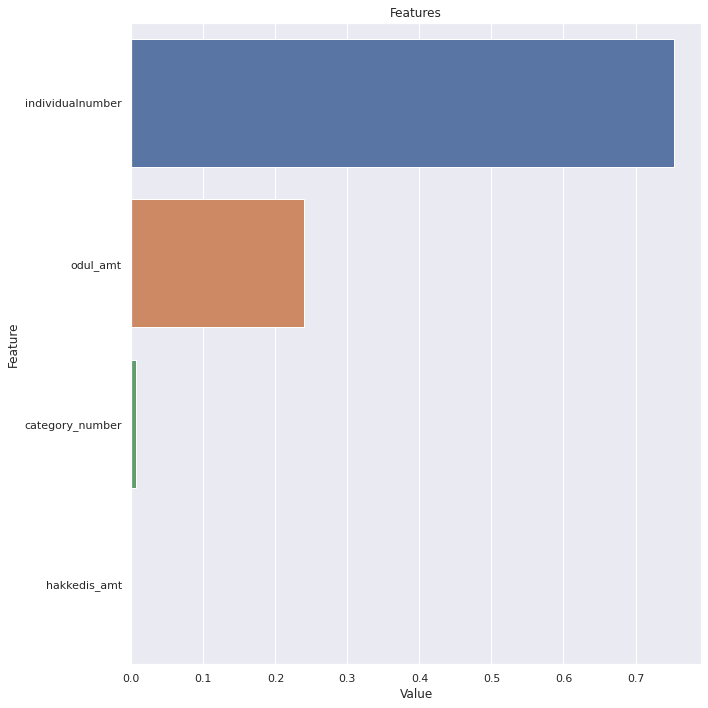

In [148]:
plot_importance(cart_final,X)

# Random Forest

In [149]:
from sklearn.ensemble import RandomForestClassifier

In [150]:
# bağımlı ve bağımsız değişkenleri seçelim
y=train_test["response"] 
X = train_test.drop(["response"],axis=1)

In [151]:
# random forest model nesnesini getirelim
rf_model = RandomForestClassifier(random_state=17)

In [152]:
# hiperparametrelere ihtiyaç var 
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 17,
 'verbose': 0,
 'warm_start': False}

In [153]:
cv_results = cross_validate(rf_model,X,y,cv=5,scoring=["accuracy","f1","roc_auc"]) 

In [154]:
cv_results['test_accuracy'].mean()

0.9913475797721736

In [155]:
cv_results['test_f1'].mean() 

0.0

In [156]:
cv_results['test_roc_auc'].mean()

0.6766782245544913

In [157]:
rf_params = { 
             "max_depth":[3,8,None], 
             "max_features":[3,5,7,"auto"],
             "min_samples_split":[2,5,8,15,20],
             "n_estimators":[100,200,500]
            } 


In [158]:
# GridSearchCV yöntemi ile arama yapmamız lazım
rf_best_grid = GridSearchCV(rf_model,rf_params, cv=3, n_jobs=-1, verbose= True).fit(X,y)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
270 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/p

In [159]:
train_test.to_csv('train_test.csv', index = False)